In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> # **Phần 1: Business Understanding**

## Vấn đề:
- Xây dựng hệ thống dự đoán phản hồi của khách hàng về sản phẩm/dịch vụ của Hasaki (tích cực, tiêu cực, trung tính) từ các đánh giá.
- Hỗ trợ Hasaki và các đối tác cải thiện sản phẩm, dịch vụ để tăng sự hài lòng của khách hàng.

## Mục tiêu:
- Phân loại sentiment từ dữ liệu đánh giá khách hàng.
- Tăng khả năng phân tích và phản hồi nhanh chóng các ý kiến của khách hàng.

> # **Phần 2: Data Understanding**

## Dữ liệu cung cấp:
- San_pham.csv: Thông tin sản phẩm (mã, tên, giá, mô tả, điểm trung bình).
- Khach_hang.csv: Thông tin khách hàng (mã, họ tên).
- Danh_gia.csv: Đánh giá khách hàng (mã sản phẩm, mã khách hàng, nội dung bình luận, số sao, ngày giờ bình luận).


## Hướng tiếp cận:
- Sử dụng dữ liệu đánh giá từ khách hàng làm input cho bài toán sentiment analysis.
- Tập trung vào dữ liệu text (cột Noi_dung_binh_luan) và số sao để xác định sentiment.

In [ ]:
danh_gia = pd.read_csv('/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/data/Danh_gia.csv')
khach_hang = pd.read_csv('/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/data/Khach_hang.csv')
san_pham = pd.read_csv('/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/data/San_pham.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/data/Danh_gia.csv'

In [ ]:
# Merge dữ liệu
merged_data_1 = danh_gia.merge(khach_hang, on='ma_khach_hang', how='left')
final_data = merged_data_1.merge(san_pham, on='ma_san_pham', how='left')

# Đổi tên các cột
final_data.rename(columns={
    'ma_khach_hang': 'Ma_khach_hang',
    'ho_ten': 'Ho_ten',
    'ma_san_pham': 'Ma_san_pham',
    'ten_san_pham': 'Ten_san_pham',
    'noi_dung_binh_luan': 'Noi_dung_binh_luan',
    'ngay_binh_luan': 'Ngay_binh_luan',
    'so_sao': 'So_sao'
}, inplace=True)

# Lựa chọn các cột cần thiết
final_data = final_data[['Ma_khach_hang', 'Ho_ten', 'Ma_san_pham', 'Ten_san_pham',
                         'Noi_dung_binh_luan', 'Ngay_binh_luan',
                         'So_sao']]

# Hiển thị kết quả
final_data


,Ma_khach_hang,Ho_ten,Ma_san_pham,Ten_san_pham,Noi_dung_binh_luan,Ngay_binh_luan,So_sao
0,443,Nguyễn Thị Tuyết Hoa,308500015,"Mặt Nạ Naruko Bạch Ngọc Lan Dưỡng Sáng, Săn Ch...","SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",29/04/2023,5
1,1030,Nguyễn phong lan,308500015,"Mặt Nạ Naruko Bạch Ngọc Lan Dưỡng Sáng, Săn Ch...","Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",30/04/2023,5
2,689,Vy Nguyen,422216594,Combo 2 Nước Tẩy Trang Bioderma Dành Cho Da Dầ...,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,5
3,2519,Huy Jee,204100075,Nước Tẩy Trang Eucerin Dịu Nhẹ Cho Da Nhạy Cảm...,Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...,17/07/2022,5
4,402,Hồng Thu,422208977,Sữa Rửa Mặt CeraVe Cho Da Thường Đến Khô 236ml,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",15/04/2023,5
...,...,...,...,...,...,...,...
21570,1158,Lý Lệ Quân,422206043,Sữa Rửa Mặt St.Ives Tẩy Tế Bào Chết Hoa Hồng &...,"Dùng sp này bị ghiền luôn, hạt siêu mịn, mùi t...",6/8/2024,5
21571,760,Thanh Bình,100230057,Nước Tẩy Trang Bioderma Dành Cho Da Nhạy Cảm 2...,"Mua nhiều lần ở đây rồi ạ. Sản phẩm ok, giá rẻ...",17/02/2022,5
21572,2248,NGUYỄN PHƯƠNG NHI,422201504,Nước Tẩy Trang Bí Đao Cocoon Làm Sạch & Giảm D...,"Sản phẩm có một số hạn chế, không thực sự ưng ý.",5/12/2023,2
21573,2886,Huỳnh Ngà,358300001,"Kem Dưỡng Angel's Liquid Làm Sáng Da, Mờ Thâm ...","dùng kem này từ 2 năm trước, kem sáng da trắng...",27/01/2021,5


## Tổng quan dữ liệu

In [ ]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ma_khach_hang       21575 non-null  int64 
 1   Ho_ten              21574 non-null  object
 2   Ma_san_pham         21575 non-null  int64 
 3   Ten_san_pham        21575 non-null  object
 4   Noi_dung_binh_luan  20674 non-null  object
 5   Ngay_binh_luan      21575 non-null  object
 6   So_sao              21575 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.2+ MB
None


In [ ]:
print(final_data.describe())

       Ma_khach_hang   Ma_san_pham        So_sao
count   21575.000000  2.157500e+04  21575.000000
mean     1648.472491  3.211852e+08      4.631333
std      1194.633858  1.114434e+08      0.879650
min         1.000000  1.001000e+08      0.000000
25%       654.000000  2.113000e+08      5.000000
50%      1431.000000  3.583000e+08      5.000000
75%      2439.500000  4.222067e+08      5.000000
max      4735.000000  4.222228e+08      5.000000


In [ ]:
# Kiểm tra giá trị thiếu
print(final_data.isnull().sum())

Ma_khach_hang           0
Ho_ten                  1
Ma_san_pham             0
Ten_san_pham            0
Noi_dung_binh_luan    901
Ngay_binh_luan          0
So_sao                  0
dtype: int64


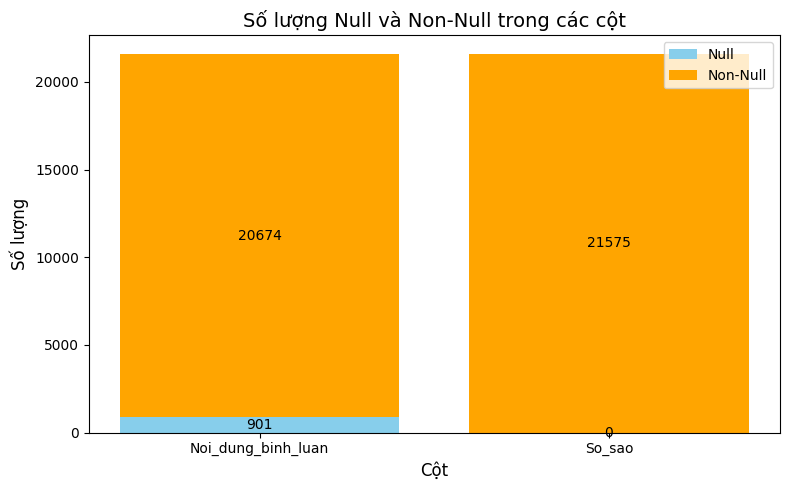

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Kiểm tra số lượng Null và Non-Null trong các cột
null_counts = {
    "Cột": ["Noi_dung_binh_luan", "So_sao"],
    "Null": [final_data["Noi_dung_binh_luan"].isnull().sum(), final_data["So_sao"].isnull().sum()],
    "Non-Null": [final_data["Noi_dung_binh_luan"].notnull().sum(), final_data["So_sao"].notnull().sum()],
}

# Chuyển từ điển thành DataFrame để dễ thao tác
null_df = pd.DataFrame(null_counts)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 5))

# Tạo biểu đồ stacked bar chart
bars_null = ax.bar(null_df["Cột"], null_df["Null"], label="Null", color="skyblue")
bars_non_null = ax.bar(null_df["Cột"], null_df["Non-Null"], label="Non-Null", color="orange", bottom=null_df["Null"])

# Hiển thị số liệu lên biểu đồ (số Null)
for bar, count in zip(bars_null, null_df["Null"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, str(int(count)), ha='center', va='center', color="black")

# Hiển thị số liệu lên biểu đồ (số Non-Null)
for bar, count in zip(bars_non_null, null_df["Non-Null"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(int(count)), ha='center', va='center', color="black")

# Thiết lập tiêu đề và nhãn
ax.set_title("Số lượng Null và Non-Null trong các cột", fontsize=14)
ax.set_ylabel("Số lượng", fontsize=12)
ax.set_xlabel("Cột", fontsize=12)
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Xóa các dòng có giá trị Null trong cột Noi_dung_binh_luan
final_data = final_data.dropna(subset=["Noi_dung_binh_luan"])

# Kiểm tra kích thước dữ liệu sau khi xử lý
print("Kích thước dữ liệu ban đầu:", final_data.shape)
print("Kích thước dữ liệu sau khi loại bỏ Null:", final_data.shape)

Kích thước dữ liệu ban đầu: (20674, 7)
Kích thước dữ liệu sau khi loại bỏ Null: (20674, 7)


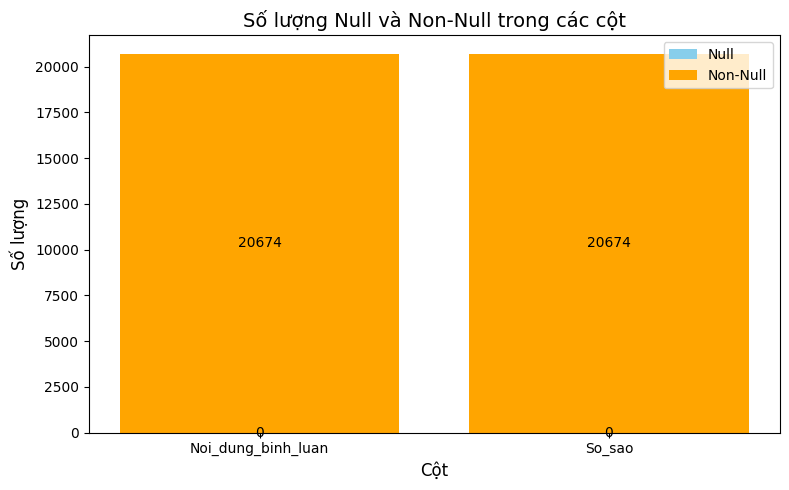

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Kiểm tra số lượng Null và Non-Null trong các cột
null_counts = {
    "Cột": ["Noi_dung_binh_luan", "So_sao"],
    "Null": [final_data["Noi_dung_binh_luan"].isnull().sum(), final_data["So_sao"].isnull().sum()],
    "Non-Null": [final_data["Noi_dung_binh_luan"].notnull().sum(), final_data["So_sao"].notnull().sum()],
}

# Chuyển từ điển thành DataFrame để dễ thao tác
null_df = pd.DataFrame(null_counts)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 5))

# Tạo biểu đồ stacked bar chart
bars_null = ax.bar(null_df["Cột"], null_df["Null"], label="Null", color="skyblue")
bars_non_null = ax.bar(null_df["Cột"], null_df["Non-Null"], label="Non-Null", color="orange", bottom=null_df["Null"])

# Hiển thị số liệu lên biểu đồ (số Null)
for bar, count in zip(bars_null, null_df["Null"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, str(int(count)), ha='center', va='center', color="black")

# Hiển thị số liệu lên biểu đồ (số Non-Null)
for bar, count in zip(bars_non_null, null_df["Non-Null"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(int(count)), ha='center', va='center', color="black")

# Thiết lập tiêu đề và nhãn
ax.set_title("Số lượng Null và Non-Null trong các cột", fontsize=14)
ax.set_ylabel("Số lượng", fontsize=12)
ax.set_xlabel("Cột", fontsize=12)
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [ ]:
final_data['Ho_ten'].fillna('Khách hàng không rõ tên', inplace=True)

<ipython-input-11-401c8208967e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['Ho_ten'].fillna('Khách hàng không rõ tên', inplace=True)
<ipython-input-11-401c8208967e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Ho_ten'].fillna('Khách hàng không rõ tên', inplace=True)


## Xem phân phối số liệu

In [ ]:
# Kiểm tra số lượng dòng với So_sao = 0
invalid_ratings = final_data[final_data["So_sao"] == 0]
print(f"Số lượng dòng với So_sao = 0: {len(invalid_ratings)}")

# Hiển thị các dòng này
print("\nCác dòng có So_sao = 0:")
print(invalid_ratings)


Số lượng dòng với So_sao = 0: 0

Các dòng có So_sao = 0:
Empty DataFrame
Columns: [Ma_khach_hang, Ho_ten, Ma_san_pham, Ten_san_pham, Noi_dung_binh_luan, Ngay_binh_luan, So_sao]
Index: []


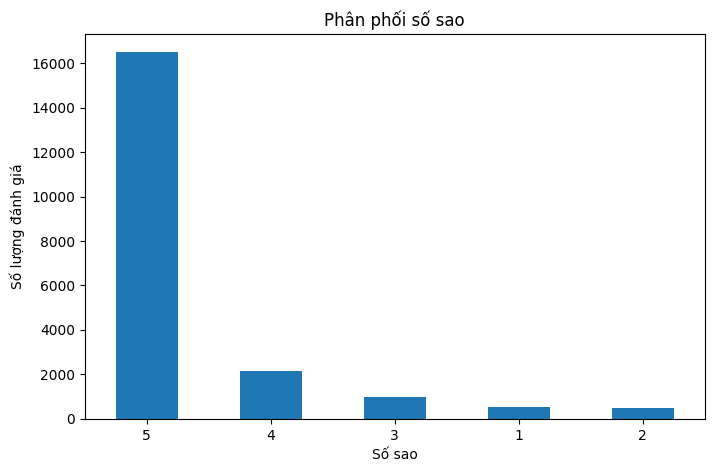

In [ ]:
import matplotlib.pyplot as plt

# Đếm số lượng đánh giá theo từng mức sao
rating_counts = final_data['So_sao'].value_counts()

# Biểu đồ phân phối số sao
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar')
plt.title('Phân phối số sao')
plt.xlabel('Số sao')
plt.ylabel('Số lượng đánh giá')
plt.xticks(rotation=0)
plt.show()


<ipython-input-14-44d7470b3e72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Sentiment'] = final_data['So_sao'].apply(get_sentiment)


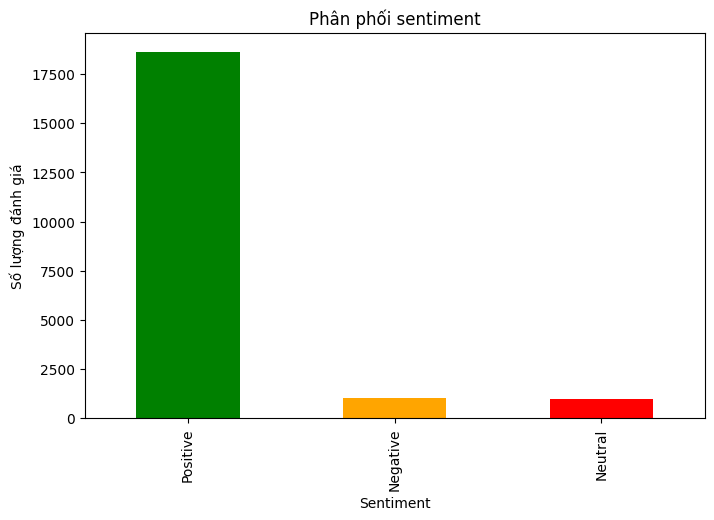

In [ ]:
# Tạo cột sentiment từ số sao
def get_sentiment(star):
    if star >= 4:
        return 'Positive'
    elif star == 3:
        return 'Neutral'
    else:
        return 'Negative'

final_data['Sentiment'] = final_data['So_sao'].apply(get_sentiment)

# Phân phối sentiment
sentiment_counts = final_data['Sentiment'].value_counts()

# Biểu đồ phân phối sentiment
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Phân phối sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Số lượng đánh giá')
plt.show()


<ipython-input-15-7ef06f276537>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Comment_Length'] = final_data['Noi_dung_binh_luan'].apply(len)


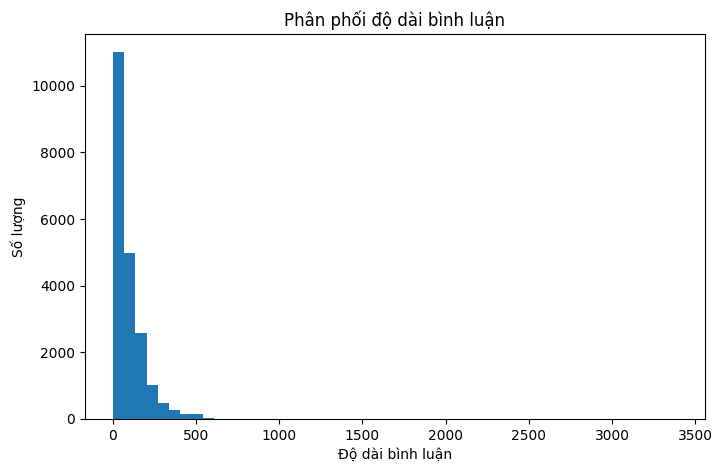

In [ ]:

# Thêm cột độ dài bình luận (số ký tự)
final_data['Comment_Length'] = final_data['Noi_dung_binh_luan'].apply(len)

# Biểu đồ phân phối độ dài bình luận
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
final_data['Comment_Length'].hist(bins=50)
plt.title('Phân phối độ dài bình luận')
plt.xlabel('Độ dài bình luận')
plt.ylabel('Số lượng')

plt.grid(False)

plt.show()



<ipython-input-16-4a6cc1de4b1b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Log_Comment_Length'] = np.log1p(final_data['Comment_Length'])


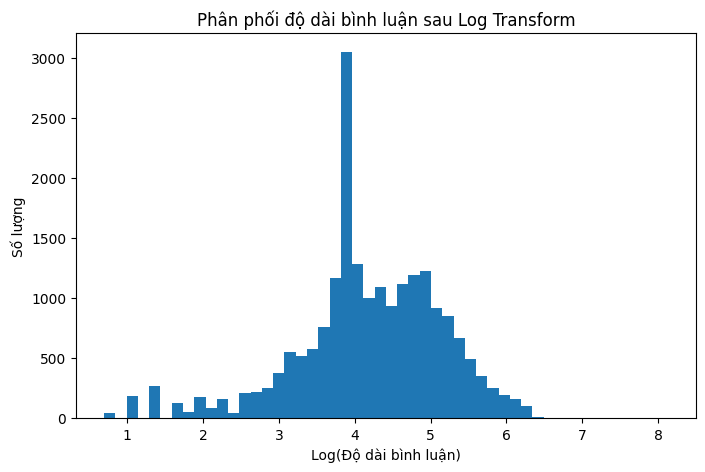

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Áp dụng log transform (thêm 1 để tránh log(0))
final_data['Log_Comment_Length'] = np.log1p(final_data['Comment_Length'])

# Biểu đồ phân phối sau khi log transform
plt.figure(figsize=(8, 5))
final_data['Log_Comment_Length'].hist(bins=50)
plt.title('Phân phối độ dài bình luận sau Log Transform')
plt.xlabel('Log(Độ dài bình luận)')
plt.ylabel('Số lượng')
plt.grid(False)
plt.show()


> # **Phần 3: Data Preparation**

## Xử lý dữ liệu văn bản

In [ ]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import string

In [ ]:
# LOAD EMOJICON
emoji_dict = {}
with open('/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/files/emojicon.txt', 'r', encoding="utf8") as file:
    emoji_lst = file.read().split('\n')
    for line in emoji_lst:
        if '\t' in line:  # Kiểm tra nếu dòng chứa ký tự tab
            try:
                key, value = line.split('\t')
                emoji_dict[key.strip()] = value.strip()  # Loại bỏ khoảng trắng thừa
            except ValueError:
                print(f"Skipped invalid line: {line}")  # In ra nếu dòng không hợp lệ

#################
# LOAD TEENCODE
teen_dict = {}
with open('/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/files/teencode.txt', 'r', encoding="utf8") as file:
    teen_lst = file.read().split('\n')
    for line in teen_lst:
        if '\t' in line:  # Kiểm tra nếu dòng chứa ký tự tab
            try:
                key, value = line.split('\t')
                teen_dict[key.strip()] = value.strip()  # Loại bỏ khoảng trắng thừa
            except ValueError:
                print(f"Skipped invalid line: {line}")

###############
# LOAD TRANSLATE ENGLISH -> VNMESE
english_dict = {}
with open('/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/files/english-vnmese.txt', 'r', encoding="utf8") as file:
    english_lst = file.read().split('\n')
    for line in english_lst:
        if '\t' in line:  # Kiểm tra nếu dòng chứa ký tự tab
            try:
                key, value = line.split('\t')
                english_dict[key.strip()] = value.strip()
            except ValueError:
                print(f"Skipped invalid line: {line}")

################
# LOAD wrong words
with open('/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/files/wrong-word.txt', 'r', encoding="utf8") as file:
    wrong_lst = [word.strip() for word in file.read().split('\n') if word.strip()]  # Loại bỏ dòng trống và khoảng trắng thừa

#################
# LOAD STOPWORDS
with open('/content/drive/MyDrive/LDS7_K299_Online_Hoàng Ngọc Thủy Thương/Project_1/Cung_cap_HV/files/vietnamese-stopwords.txt', 'r', encoding="utf8") as file:
    stopwords_lst = [word.strip() for word in file.read().split('\n') if word.strip()]  # Loại bỏ dòng trống và khoảng trắng thừa


In [ ]:
print("Emoji Dictionary Sample:", list(emoji_dict.items())[:5])
print("Teen Dictionary Sample:", list(teen_dict.items())[:5])
print("English Dictionary Sample:", list(english_dict.items())[:5])
print("Wrong Word List Sample:", wrong_lst[:5])
print("Stopwords List Sample:", stopwords_lst[:5])


Emoji Dictionary Sample: [('❤', 'yêu'), ('👍', 'thích'), ('😍', 'cười'), ('😊', 'cười'), ('😘', 'cười')]
Teen Dictionary Sample: [('ctrai', 'con trai'), ('khôg', 'không'), ('bme', 'bố mẹ'), ('cta', 'chúng ta'), ('mih', 'mình')]
English Dictionary Sample: [('district', 'huyện'), ('pebble', 'đá cuội'), ('wedding', 'lễ cưới'), ('comment', 'bình luận'), ('thought', 'nghĩ')]
Wrong Word List Sample: ['aud', 'se', 'gd', 'tz', 'voi']
Stopwords List Sample: ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy']


In [ ]:
def process_text(text, emoji_dict, teen_dict, wrong_lst):
    document = text.lower()
    document = document.replace("’", '')
    document = regex.sub(r'\.+', ".", document)

    # Xử lý Emoji
    document = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(document))

    # Xử lý Teen Code
    document = ' '.join(teen_dict[word] if word in teen_dict else word for word in document.split())

    # Loại bỏ từ sai
    document = ' '.join('' if word in wrong_lst else word for word in document.split())

    # Loại bỏ khoảng trắng thừa
    document = regex.sub(r'\s+', ' ', document).strip()

    return document


In [ ]:
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i = 0
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if word == 'không':
                next_idx = i + 1
                if next_idx <= len(text_lst) - 1:
                    word = word + '_' + text_lst[next_idx]
                i = next_idx + 1
            else:
                i += 1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()


In [ ]:
example = '''Mình rất thích hasaki va sp tẩy trang này'''

In [ ]:
print(example)

Mình rất thích hasaki va sp tẩy trang này


In [ ]:
document = process_text(example, emoji_dict, teen_dict, wrong_lst)
document

'mình rất thích hasaki sản phẩm tẩy này'

In [ ]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [ ]:
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i = 0
    while i <= len(text_lst) - 1:
        word = text_lst[i]
        # Nếu từ là "không", kiểm tra từ tiếp theo
        if word == 'không' and i + 1 < len(text_lst):
            next_word = text_lst[i + 1]
            word = f"{word}_{next_word}"  # Nối "không" với từ tiếp theo
            i += 1  # Bỏ qua từ tiếp theo đã được nối
        new_text += word + ' '
        i += 1
    return new_text.strip()


In [ ]:
x = process_special_word(document)
x

'mình rất thích hasaki sản phẩm tẩy này'

In [ ]:
import re
# Hàm để chuẩn hóa các từ có ký tự lặp
def normalize_repeated_characters(text):
    # Thay thế mọi ký tự lặp liên tiếp bằng một ký tự đó
    # Ví dụ: "lònggggg" thành "lòng", "thiệtttt" thành "thiệt"
    return re.sub(r'(.)\1+', r'\1', text)

# Áp dụng hàm chuẩn hóa cho văn bản
# print(normalize_repeated_characters(example))

In [ ]:
document = normalize_repeated_characters(document)
print(document)

mình rất thích hasaki sản phẩm tẩy này


In [ ]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.', '')
        lst_word_type = ['N', 'Np', 'A', 'AB', 'V', 'VB', 'VY', 'R']
        sentence = ' '.join(word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document


In [ ]:
document = process_postag_thesea(document)

In [ ]:
document

'rất thích hasaki sản_phẩm tẩy'

In [ ]:
def remove_stopword(text, stopwords):
    document = ' '.join(word for word in text.split() if word not in stopwords)
    return regex.sub(r'\s+', ' ', document).strip()  # Xóa khoảng trắng thừa


In [ ]:
document = remove_stopword(document, stopwords_lst)
document

'rất thích hasaki sản_phẩm tẩy'

In [ ]:
# Load Emoji File
emoji_dict = {}
for line in emoji_lst:
    if '\t' in line:  # Chỉ xử lý dòng chứa ký tự tab
        key, value = line.split('\t')
        emoji_dict[key.strip()] = value.strip()

# Load Teen Code File
teen_dict = {}
for line in teen_lst:
    if '\t' in line:
        key, value = line.split('\t')
        teen_dict[key.strip()] = value.strip()

print("Processed emoji_dict:", list(emoji_dict.items())[:10])
print("Processed teen_dict:", list(teen_dict.items())[:10])



Processed emoji_dict: [('❤', 'yêu'), ('👍', 'thích'), ('😍', 'cười'), ('😊', 'cười'), ('😘', 'cười'), ('🥰', 'cười'), ('😁', 'cười'), ('😤', 'tức'), ('👌', 'thích'), ('⭐', 'thích')]
Processed teen_dict: [('ctrai', 'con trai'), ('khôg', 'không'), ('bme', 'bố mẹ'), ('cta', 'chúng ta'), ('mih', 'mình'), ('mqh', 'mối quan hệ'), ('cgai', 'con gái'), ('nhữg', 'những'), ('mng', 'mọi người'), ('svtn', 'sinh viên tình nguyện')]


In [ ]:
# Lưu nội dung gốc của cột trước khi xử lý
final_data['Noi_dung_binh_luan_goc'] = final_data['Noi_dung_binh_luan']

# Bước 1: Xử lý text cơ bản với process_text
final_data['Noi_dung_binh_luan'] = final_data['Noi_dung_binh_luan'].apply(
    lambda x: process_text(x, emoji_dict, teen_dict, wrong_lst)
)

# Bước 2: Chuyển văn bản về dạng không dấu
final_data['Noi_dung_binh_luan'] = final_data['Noi_dung_binh_luan'].apply(covert_unicode)

# Bước 3: Xử lý từ đặc biệt (ví dụ: "không tốt" -> "không_tốt")
final_data['Noi_dung_binh_luan'] = final_data['Noi_dung_binh_luan'].apply(process_special_word)

# Bước 4: Loại bỏ stopwords
final_data['Noi_dung_binh_luan'] = final_data['Noi_dung_binh_luan'].apply(
    lambda x: remove_stopword(x, stopwords_lst)
)

# Bước 5: POS tagging và lọc từ loại cần thiết
final_data['Noi_dung_binh_luan'] = final_data['Noi_dung_binh_luan'].apply(process_postag_thesea)


<ipython-input-37-fcdf957281c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Noi_dung_binh_luan_goc'] = final_data['Noi_dung_binh_luan']
<ipython-input-37-fcdf957281c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Noi_dung_binh_luan'] = final_data['Noi_dung_binh_luan'].apply(
<ipython-input-37-fcdf957281c1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
# Tạo bảng so sánh trước và sau xử lý
comparison_table = final_data[['Noi_dung_binh_luan_goc', 'Noi_dung_binh_luan']].head(20)

comparison_table

,Noi_dung_binh_luan_goc,Noi_dung_binh_luan
0,"SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",sử_dụng dễ_dàng rất thoải_mái
1,"Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",sử_dụng dễ dãng rất thoải_mái
2,Mình rất thích hasaki va sp tẩy trang này,rất thích hasaki sản_phẩm
3,Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...,sản_phẩm khả_năng sạch tốt lớp da mắt môi_chón...
4,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",sữa rửa mặt tốt sạch mụn mịn da đáng
6,"Sau 77 49 dòng srm, thì chân ái là đây, mua tu...",77 dòng srm chân_ái tuyp thử trc ml luôn đánh_...
7,Đó giờ mình sài bha của obagi cũng 3-4 chai rồ...,sài bha obagi 3-4 đổi thử sài hasaki chuẩn hàn...
8,Rất ok mình xài 2 chai rồi,rất xài
9,"Mik bị kich ứng, không hợp sản phẩm, sd được 3...",ứng không_hợp sản_phẩm ngay
10,nhân viên tư vấn như mới train và được nhận vì...,nhân_viên tư_vấn train đẹp át sản_phẩm dán mụn...


# Tạo thêm các cột mới dựa trên việc đếm từ/icon positive, negative, neutral

In [ ]:
def find_words(text, word_list):
    text = text.lower()  # Đưa văn bản về chữ thường
    word_count = 0
    found_words = []

    for word in word_list:
        if word in text:
            count = text.count(word)  # Đếm số lần từ xuất hiện
            word_count += count
            found_words.append(word)

    return word_count, found_words


In [ ]:
positive_words = [
    "thích", "tốt", "xuất sắc", "tuyệt vời", "ổn",
    "hài lòng", "ưng ý", "hoàn hảo", "chất lượng", "nhanh",
    "tiện lợi", "dễ sử dụng", "hiệu quả", "ấn tượng",
    "nổi bật", "thân thiện", "cao cấp", "độc đáo", "rất tốt", "rất thích",
    "tận tâm", "đáng tin cậy", "đẳng cấp", "hấp dẫn", "an tâm", "thúc đẩy",
    "cảm động", "phục vụ tốt", "làm hài lòng", "gây ấn tượng", "nổi trội",
    "sáng tạo", "phù hợp", "tận tâm", "hiếm có", "cải thiện", "hoà nhã",
    "chăm chỉ", "cẩn thận", "vui vẻ", "sáng sủa", "hào hứng", "đam mê",
    "vừa vặn", "đáng tiền", "đáng mua", "đặc sắc", "vượt trội", "dễ chịu",
    "tiện nghi", "rất hữu ích", "an toàn", "bền", "dễ bảo quản", "xứng đáng",
    "ngon", "xuất thần", "lịch sự", "tinh tế", "ngăn nắp", "sạch sẽ",
    "ấm áp", "khích lệ", "đáng yêu", "chất lượng cao", "vui lòng", "rất nhanh",
    "tinh thần tốt", "thân ái", "yêu thích", "khuyến khích", "bất ngờ", "hoàn thiện"
]

In [ ]:
negative_words = [
    "kém", "tệ", "buồn", "chán", "không dễ chịu", "không chất lượng",
    "kém chất lượng", "không thích", "không ổn", "không hợp",
    "không đáng tin cậy", "không chuyên nghiệp", "không phản hồi",
    "không an toàn", "không phù hợp", "không thân thiện", "không linh hoạt",
    "không đáng giá", "không ấn tượng", "không tốt", "chậm", "khó khăn",
    "phức tạp", "khó chịu", "gây khó dễ", "rườm rà", "thất bại", "tồi tệ",
    "khó xử", "không thể chấp nhận", "tồi tệ", "không rõ ràng", "không chắc chắn",
    "rối rắm", "không tiện lợi", "không đáng tiền", "không hài lòng",
    "không đáng", "quá tệ", "rất tệ", "thất vọng", "chán", "tệ hại",
    "kinh khủng", "không ưng ý", "cực kỳ tệ", "bất tiện", "phản cảm",
    "lãng phí", "xấu", "khó hiểu", "thiếu tổ chức", "nguy hiểm", "dở",
    "thất vọng lớn", "không thỏa đáng", "bất mãn", "bực mình", "rối loạn",
    "phiền toái", "xấu hổ", "mất thời gian", "cẩu thả", "không chấp nhận được",
    "quá chậm", "tệ đến mức không tin nổi", "thất vọng nghiêm trọng", "quá rườm rà"
]

In [ ]:
# Từ điển các từ trung tính
neutral_words = [
    "bình thường", "trung bình", "không khác biệt", "vừa phải", "ổn định",
    "chấp nhận được", "không có gì đặc biệt", "đạt yêu cầu", "đáp ứng nhu cầu",
    "không gây khó chịu", "tạm ổn", "không quá nổi bật", "không tệ", "dùng được",
    "tương đối", "vừa đủ", "trung lập", "phổ thông", "bình dị", "thông thường",
    "không gây ảnh hưởng", "không sao", "thường", "tạm chấp nhận",
    "không tốt không xấu", "ở mức trung bình", "không có gì nổi trội",
    "không đặc biệt", "đều đều", "đơn giản", "vừa vặn", "hợp lý",
    "bình ổn", "không đáng chú ý", "đạt tiêu chuẩn", "không có gì phàn nàn",
    "ổn thoả", "không nổi bật", "dễ chịu ở mức vừa phải", "không đột phá",
    "không vượt trội", "thực tế", "không quá tốt", "không quá xấu",
    "được chấp nhận", "không làm phiền", "vừa sức", "ở mức vừa phải",
    "tròn vai", "không cần thiết phải cải thiện", "không làm hài lòng nhưng cũng không gây thất vọng",
    "không quá tệ", "trong ngưỡng bình thường", "không phải là tốt nhất",
    "không gây ấn tượng mạnh", "không đủ nổi bật", "vẫn ổn", "chỉ đủ dùng",
    "không hoàn hảo", "hơi nhạt nhẽo", "cơ bản", "không tạo sự khác biệt lớn"
]


In [ ]:
# Hàm tính toán sentiment counts (tích cực, tiêu cực, trung tính)
def calculate_sentiment_counts_with_neutral(row):
    positive_count, _ = find_words(row, positive_words)
    negative_count, _ = find_words(row, negative_words)
    neutral_count, _ = find_words(row, neutral_words)
    return positive_count, negative_count, neutral_count

final_data[['positive_count', 'negative_count', 'neutral_count']] = final_data['Noi_dung_binh_luan'].apply(
    lambda x: pd.Series(calculate_sentiment_counts_with_neutral(x))
)

<ipython-input-43-3b71eff07b44>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[['positive_count', 'negative_count', 'neutral_count']] = final_data['Noi_dung_binh_luan'].apply(
<ipython-input-43-3b71eff07b44>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[['positive_count', 'negative_count', 'neutral_count']] = final_data['Noi_dung_binh_luan'].apply(
<ipython-input-43-3b71eff07b44>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [ ]:
final_data[['Noi_dung_binh_luan', 'positive_count', 'negative_count', 'neutral_count']].head()


,Noi_dung_binh_luan,positive_count,negative_count,neutral_count
0,sử_dụng dễ_dàng rất thoải_mái,0,0,0
1,sử_dụng dễ dãng rất thoải_mái,0,0,0
2,rất thích hasaki sản_phẩm,2,0,0
3,sản_phẩm khả_năng sạch tốt lớp da mắt môi_chón...,1,0,0
4,sữa rửa mặt tốt sạch mụn mịn da đáng,1,0,0


In [ ]:
positive_emojis = [
    "😄", "😃", "😀", "😁", "😆", "😅", "🤣", "😂", "🙂", "🙃",
    "😉", "😊", "😇", "🥰", "😍", "🤩", "😘", "😗", "😚", "😙",
    "😋", "😛", "😜", "🤪", "😝", "🤗", "🤭", "🥳", "😌", "😎",
    "🤓", "🧐", "👍", "🤝", "🙌", "👏", "👋", "🤙", "✋", "🖐️",
    "👌", "🤞", "✌️", "🤟", "👈", "👉", "👆", "👇", "☝️", "💚",
    "💖", "💞", "💕", "💓", "💗", "💝", "💘", "❣️", "💟", "💌",
    "❤️", "🧡", "💛", "💜", "💙", "💚", "💯", "🔥", "✨", "🌟",
    "⭐", "🌠", "🎉", "🎊", "🎈", "🎁", "🎀", "🥇", "🏆", "🏅",
    "💐", "🌸", "🌺", "🌻", "🌼", "🌷", "🌹", "🌞", "☀️", "☀",
    "🕊️", "🎶", "🎵", "🎼", "🥂", "🍾", "🍻", "🥰", "😘", "😇"
]

negative_emojis = [
    "😞", "😔", "🙁", "☹️", "😕", "😢", "😭", "😖", "😣", "😩",
    "😠", "😡", "🤬", "😤", "😰", "😨", "😱", "😪", "😓", "🥺",
    "😒", "🙄", "😑", "😬", "😶", "🤯", "😳", "🤢", "🤮", "🤕",
    "🥴", "🤔", "😷", "🙅‍♂️", "🙅‍♀️", "🙇‍♂️",
    "🙇‍♀️", "🤦‍♂️", "🤦‍♀️", "🤷‍♂️", "🤷‍♀️", "🤢", "🤧", "🤨",
    "🤫", "👎", "👊", "✊", "🤛", "🤜", "🤚", "🖕", "😠", "😡",
    "💔", "❌", "🚫", "🔴", "🛑", "⚠️", "‼️", "😧", "😟", "😞",
    "😣", "😫", "😖", "😞", "😤", "😩", "🥵", "🥶", "🙃", "🥴"
]

neutral_emojis = [
    "😐", "😶", "🤔", "🤫", "🤨", "🙄", "🧐",
    "✋", "👊", "👉", "👈", "👆", "👇", "☝️", "🤙", "🤝", "👋",
    "🖐️", "✌️", "👌", "🤞", "🤟", "🤯", "🕶️", "📚", "📖", "📒",
    "📓", "📔", "📝", "✏️", "💼", "👜", "💡", "📊", "📈", "📉",
    "📅", "🕗", "🕘", "📷", "📹", "🎥", "🎬", "🕹️", "🎮", "📋",
    "📎", "📐", "📌", "📍", "🗑️", "🗂️", "💾", "📤", "📥", "💳"
]


In [ ]:
def calculate_sentiment_counts_with_emojis(row):
    # Đếm từ
    positive_word_count, _ = find_words(row, positive_words)
    negative_word_count, _ = find_words(row, negative_words)
    neutral_word_count, _ = find_words(row, neutral_words)

    # Đếm emoji
    positive_emoji_count, _ = find_words(row, positive_emojis)
    negative_emoji_count, _ = find_words(row, negative_emojis)
    neutral_emoji_count, _ = find_words(row, neutral_emojis)

    # Tổng số tích cực, tiêu cực, trung tính
    positive_count = positive_word_count + positive_emoji_count
    negative_count = negative_word_count + negative_emoji_count
    neutral_count = neutral_word_count + neutral_emoji_count

    return positive_count, negative_count, neutral_count

In [ ]:
final_data[['positive_count', 'negative_count', 'neutral_count']] = final_data['Noi_dung_binh_luan'].apply(
    lambda x: pd.Series(calculate_sentiment_counts_with_emojis(x))
)

# Kiểm tra kết quả
print(final_data[['Noi_dung_binh_luan', 'positive_count', 'negative_count', 'neutral_count']].head())


                                  Noi_dung_binh_luan  positive_count  \
0                      sử_dụng dễ_dàng rất thoải_mái               0   
1                      sử_dụng dễ dãng rất thoải_mái               0   
2                          rất thích hasaki sản_phẩm               2   
3  sản_phẩm khả_năng sạch tốt lớp da mắt môi_chón...               1   
4               sữa rửa mặt tốt sạch mụn mịn da đáng               1   

   negative_count  neutral_count  
0               0              0  
1               0              0  
2               0              0  
3               0              0  
4               0              0  


<ipython-input-47-0be82bf5c689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[['positive_count', 'negative_count', 'neutral_count']] = final_data['Noi_dung_binh_luan'].apply(


In [ ]:
final_data[['Noi_dung_binh_luan', 'positive_count', 'negative_count', 'neutral_count']].head()

,Noi_dung_binh_luan,positive_count,negative_count,neutral_count
0,sử_dụng dễ_dàng rất thoải_mái,0,0,0
1,sử_dụng dễ dãng rất thoải_mái,0,0,0
2,rất thích hasaki sản_phẩm,2,0,0
3,sản_phẩm khả_năng sạch tốt lớp da mắt môi_chón...,1,0,0
4,sữa rửa mặt tốt sạch mụn mịn da đáng,1,0,0


In [ ]:
# pip install wordcloud


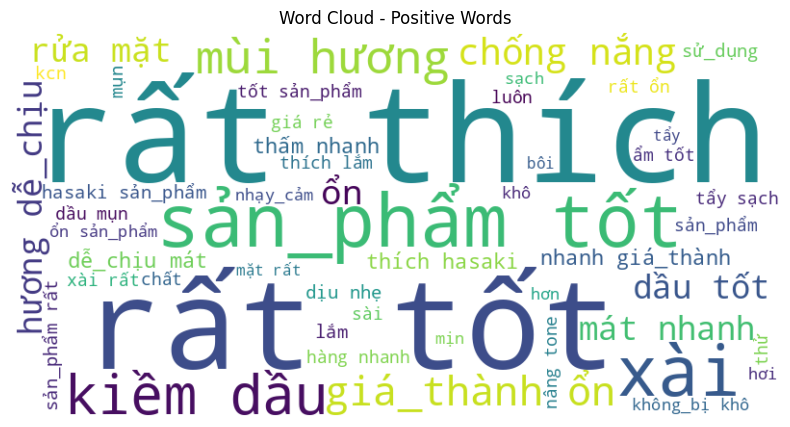

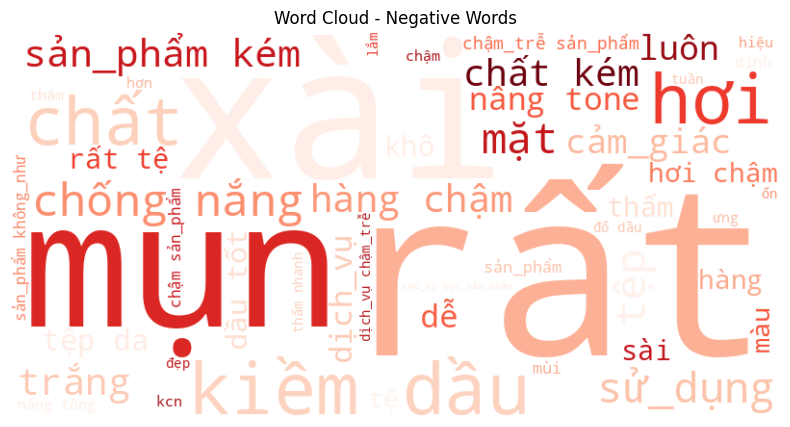

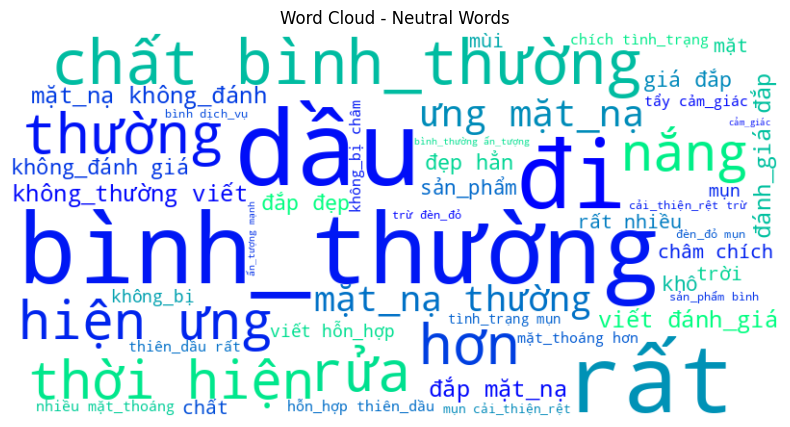

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# Định nghĩa các từ dừng (nếu cần)
custom_stopwords = set(STOPWORDS)

# Vẽ Word Cloud cho từ tích cực
positive_text = ' '.join(final_data['Noi_dung_binh_luan'][final_data['positive_count'] > 0])
wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=50,  # Hiển thị tối đa 50 từ
    stopwords=custom_stopwords
).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.title("Word Cloud - Positive Words")
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

# Vẽ Word Cloud cho từ tiêu cực
negative_text = ' '.join(final_data['Noi_dung_binh_luan'][final_data['negative_count'] > 0])
wordcloud_negative = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',  # Màu sắc cho từ tiêu cực
    max_words=50,  # Hiển thị tối đa 50 từ
    stopwords=custom_stopwords
).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.title("Word Cloud - Negative Words")
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

# Vẽ Word Cloud cho từ trung tính
neutral_text = ' '.join(final_data['Noi_dung_binh_luan'][(final_data['neutral_count'] > 0) &
                                                         (final_data['positive_count'] == 0) &
                                                         (final_data['negative_count'] == 0)])
wordcloud_neutral = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='winter',
    max_words=50,  # Hiển thị tối đa 50 từ
    stopwords=custom_stopwords
).generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.title("Word Cloud - Neutral Words")
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.show()


Bảng Thống Kê Số Lượng Từ Theo Sentiment:
  Sentiment  positive_count  negative_count  neutral_count
2  Positive           11495             280            150
1   Neutral             312              70             29
0  Negative             199             325             38


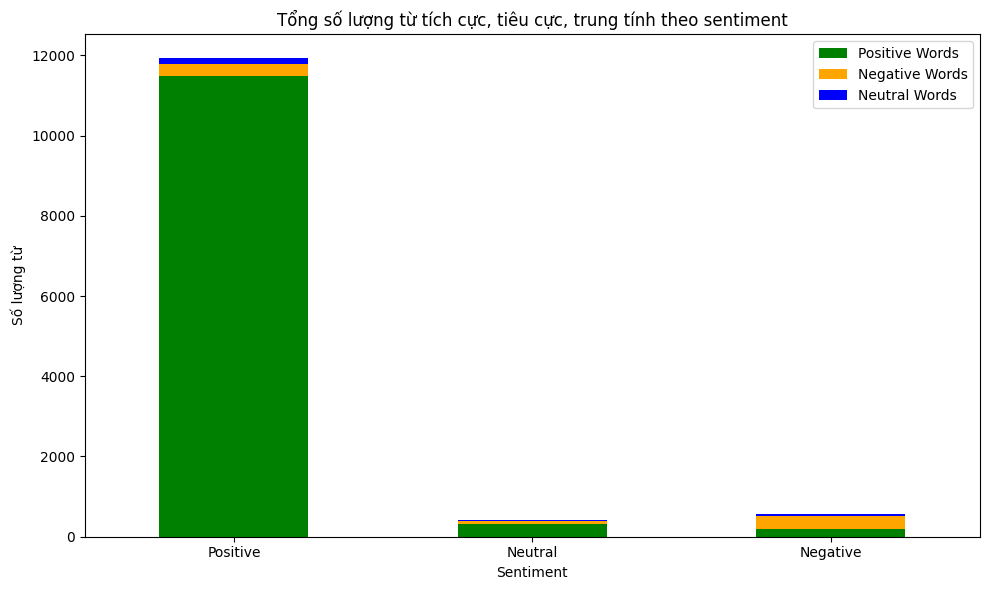

In [ ]:
# Tạo bảng thống kê số lượng từ theo sentiment
sentiment_summary = final_data.groupby('Sentiment')[['positive_count', 'negative_count', 'neutral_count']].sum().reset_index()

# Sắp xếp thứ tự Sentiment nếu cần
sentiment_order = ['Positive', 'Neutral', 'Negative']
sentiment_summary['Sentiment'] = pd.Categorical(sentiment_summary['Sentiment'], categories=sentiment_order, ordered=True)
sentiment_summary = sentiment_summary.sort_values('Sentiment')

# Hiển thị bảng kết quả
print("Bảng Thống Kê Số Lượng Từ Theo Sentiment:")
print(sentiment_summary)

# Vẽ biểu đồ trực quan hóa
import matplotlib.pyplot as plt

# Đặt sentiment làm index để vẽ biểu đồ
sentiment_summary.set_index('Sentiment', inplace=True)

# Vẽ biểu đồ stacked bar chart
sentiment_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'orange', 'blue'])

plt.title('Tổng số lượng từ tích cực, tiêu cực, trung tính theo sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Số lượng từ')
plt.legend(['Positive Words', 'Negative Words', 'Neutral Words'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Chuẩn bị dữ liệu đầu vào cho mô hình học máy

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# 1. Chuẩn bị dữ liệu
# Lấy dữ liệu văn bản (Noi_dung_binh_luan) và nhãn (Sentiment)
X = final_data['Noi_dung_binh_luan']  # Văn bản đầu vào
y = final_data['Sentiment']  # Nhãn cảm xúc

# 2. CountVectorizer
print("=== CountVectorizer ===")
count_vectorizer = CountVectorizer(max_features=5000)  # Chọn tối đa 5000 từ phổ biến nhất
X_count = count_vectorizer.fit_transform(X)
print("Kích thước dữ liệu sau CountVectorizer:", X_count.shape)

# 3. TF-IDF Vectorizer
print("\n=== TF-IDF Vectorizer ===")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Chọn tối đa 5000 từ phổ biến nhất
X_tfidf = tfidf_vectorizer.fit_transform(X)
print("Kích thước dữ liệu sau TF-IDF:", X_tfidf.shape)

# 4. Chia dữ liệu thành tập huấn luyện và kiểm thử (80% train - 20% test)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
X_train_count, X_test_count, _, _ = train_test_split(X_count, y, test_size=0.2, random_state=42, stratify=y)

# 5. Kiểm tra kích thước tập dữ liệu sau khi tách
print("\n=== Kích thước tập TF-IDF ===")
print("Tập huấn luyện:", X_train_tfidf.shape)
print("Tập kiểm thử:", X_test_tfidf.shape)

print("\n=== Kích thước tập CountVectorizer ===")
print("Tập huấn luyện:", X_train_count.shape)
print("Tập kiểm thử:", X_test_count.shape)


=== CountVectorizer ===
Kích thước dữ liệu sau CountVectorizer: (20674, 5000)

=== TF-IDF Vectorizer ===
Kích thước dữ liệu sau TF-IDF: (20674, 5000)

=== Kích thước tập TF-IDF ===
Tập huấn luyện: (16539, 5000)
Tập kiểm thử: (4135, 5000)

=== Kích thước tập CountVectorizer ===
Tập huấn luyện: (16539, 5000)
Tập kiểm thử: (4135, 5000)


Phân phối nhãn trước khi áp dụng SMOTE: Counter({'Positive': 14920, 'Negative': 836, 'Neutral': 783})
Phân phối nhãn sau khi áp dụng SMOTE: Counter({'Positive': 14920, 'Negative': 11936, 'Neutral': 7460})


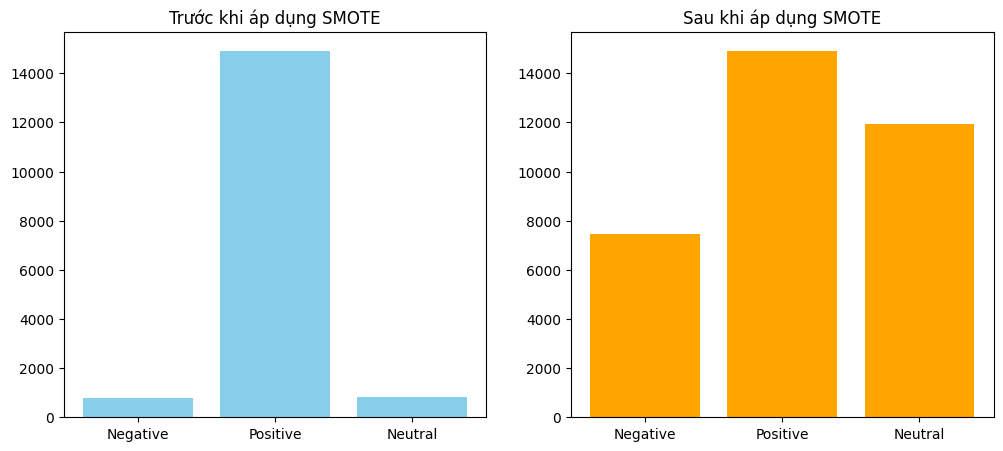

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Điều chỉnh sampling_strategy để chỉ tăng số lượng lớp Negative và Neutral
sampling_strategy = {
    'Negative': 11936,  # Tăng số lượng lớp Negative lên 80% của lớp positive
    'Positive': 14920,  # Giữ nguyên lớp Positive
    'Neutral': 7460}    # Tăng số lượng lớp Neutral lên 50% của lớp positive

smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)

# Tạo dữ liệu huấn luyện đã được cân bằng
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Kiểm tra lại phân phối nhãn sau khi áp dụng SMOTE
print("Phân phối nhãn trước khi áp dụng SMOTE:", Counter(y_train))
print("Phân phối nhãn sau khi áp dụng SMOTE:", Counter(y_train_resampled))

# Hàm vẽ phân phối nhãn trước và sau khi áp dụng SMOTE
def plot_distribution(before, after, labels):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].bar(labels, before.values(), color='skyblue')
    ax[0].set_title('Trước khi áp dụng SMOTE')

    ax[1].bar(labels, after.values(), color='orange')
    ax[1].set_title('Sau khi áp dụng SMOTE')

    plt.show()

# Chỉ định các nhãn lớp
labels = ['Negative', 'Positive', 'Neutral']
plot_distribution(Counter(y_train), Counter(y_train_resampled), labels)


> # **Phần 4: Modeling & Evaluation**

## Machine learning
- Sử dụng 3 mô hình: LogisticRegression, Random Forest, SVM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from wordcloud import WordCloud

In [ ]:
# Hàm chuẩn bị dữ liệu
def prepare_data():
   X = final_data['Noi_dung_binh_luan']  # Cột nội dung bình luận
   y = final_data['Sentiment']  # Cột nhãn cảm xúc (số sao)

   # Biến đổi văn bản thành vector
   vectorizer = CountVectorizer()
   X_encoded = vectorizer.fit_transform(X)

   # Chia dữ liệu thành tập huấn luyện và kiểm tra
   X_train, X_test, y_train, y_test = train_test_split(
       X_encoded, y, test_size=0.2, random_state=42
   )
   train_idx, test_idx = y_train.index, y_test.index
   return X_train, X_test, y_train, y_test, train_idx, test_idx


In [ ]:
# 2. Huấn luyện mô hình
def train_model(model, X_train, y_train):
   start_time = time.time()
   model.fit(X_train, y_train)
   end_time = time.time()
   elapsed_time = end_time - start_time
   return model, elapsed_time

In [ ]:
# 3. Đánh giá mô hình
def evaluate_model(model, X_train, y_train, X_test, y_test):
   # Dự đoán trên tập huấn luyện và kiểm tra
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)

   # Kiểm tra lại kiểu dữ liệu của y_train_pred và y_test_pred
   if isinstance(y_train_pred, (int, np.int64)):
       y_train_pred = np.array([y_train_pred])  # Chuyển đổi thành mảng nếu là số nguyên đơn
   if isinstance(y_test_pred, (int, np.int64)):
       y_test_pred = np.array([y_test_pred])  # Chuyển đổi thành mảng nếu là số nguyên đơn

   # Tính toán độ chính xác và in báo cáo phân loại
   train_accuracy = accuracy_score(y_train, y_train_pred)
   test_accuracy = accuracy_score(y_test, y_test_pred)

   print(f"Training Accuracy: {train_accuracy:.4f}")
   print(classification_report(y_train, y_train_pred, target_names=class_labels))

   print(f"Test Accuracy: {test_accuracy:.4f}")
   print(classification_report(y_test, y_test_pred, target_names=class_labels))

   return y_test_pred

In [ ]:
# 4. Vẽ confusion matrix
def plot_confusion_matrix(cm, model_name, classes):
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
   plt.title(f"Confusion Matrix for {model_name}")
   plt.xlabel("Predicted Labels")
   plt.ylabel("True Labels")
   plt.show()

In [ ]:
# 5. Tạo bảng kết quả dự đoán
def create_prediction_table(model, name, X_test, y_test_pred, test_idx):
   data_test = final_data.loc[test_idx].copy()  # Lấy lại các dòng từ tập test bằng test_idx
   data_test['Predicted_label'] = y_test_pred  # Nhãn dự đoán
   data_test['Sentiment'] = le.inverse_transform(data_test['Predicted_label'])
   data_test['Model'] = name  # Thêm cột ghi tên mô hình
   print(f"Sample Predictions for {name}:")
   print(data_test[['Noi_dung_binh_luan', 'So_sao', 'Predicted_label', 'Sentiment']].head())
   print("=" * 60)
   return data_test[['Noi_dung_binh_luan', 'So_sao', 'Predicted_label', 'Sentiment', 'Model']]


In [ ]:
# Phân tích chi tiết sản phẩm cụ thể
def analyze_product_details(final_data):
    # Lọc ra các sản phẩm và phân tích các bình luận tích cực và tiêu cực
    positive_comments = final_data[final_data['Sentiment'] == 'Positive']['Noi_dung_binh_luan']
    negative_comments = final_data[final_data['Sentiment'] == 'Negative']['Noi_dung_binh_luan']

    # Tạo word cloud cho các bình luận tích cực
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_comments))
    plt.figure(figsize=(8, 6))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title("WordCloud for Positive Comments")
    plt.axis("off")
    plt.show()

    # Tạo word cloud cho các bình luận tiêu cực
    negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_comments))
    plt.figure(figsize=(8, 6))
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title("WordCloud for Negative Comments")
    plt.axis("off")
    plt.show()

    # Tính tổng số nhận xét tích cực và tiêu cực
    positive_count = len(positive_comments)
    negative_count = len(negative_comments)

    print(f"Total Positive Comments: {positive_count}")
    print(f"Total Negative Comments: {negative_count}")

    # Trả về dữ liệu chi tiết
    return positive_count, negative_count, positive_wordcloud, negative_wordcloud

In [ ]:
# Gọi hàm để lấy dữ liệu
X_train, X_test, y_train, y_test, train_idx, test_idx = prepare_data()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import time

# Mã hóa nhãn
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Lấy nhãn lớp
class_labels = le.classes_
print("Class labels:", class_labels)

# Kiểm tra nhãn đã mã hóa
print("Encoded labels for y_train:", set(y_train))
print("Encoded labels for y_test:", set(y_test))

Class labels: ['Negative' 'Neutral' 'Positive']
Encoded labels for y_train: {0, 1, 2}
Encoded labels for y_test: {0, 1, 2}


Training Logistic Regression...
Training time for Logistic Regression: 4.16 seconds

Testing time for Logistic Regression: 0.00 seconds

Training Accuracy: 0.9782
Test Accuracy: 0.9661

Performance Metrics for Logistic Regression:


,Class,Precision,Recall,F1-Score,Support,Testing Time (s)
0,Negative,0.952055,0.716495,0.817647,194,0.001552
1,Neutral,0.875000,0.636364,0.736842,198,0.001552
2,Positive,0.970091,0.996527,0.983131,3743,0.001552
3,Macro Avg,0.932382,0.783128,0.845873,1550625,0.001552
4,Weighted Avg,0.964691,0.966143,0.963574,1550625,0.001552


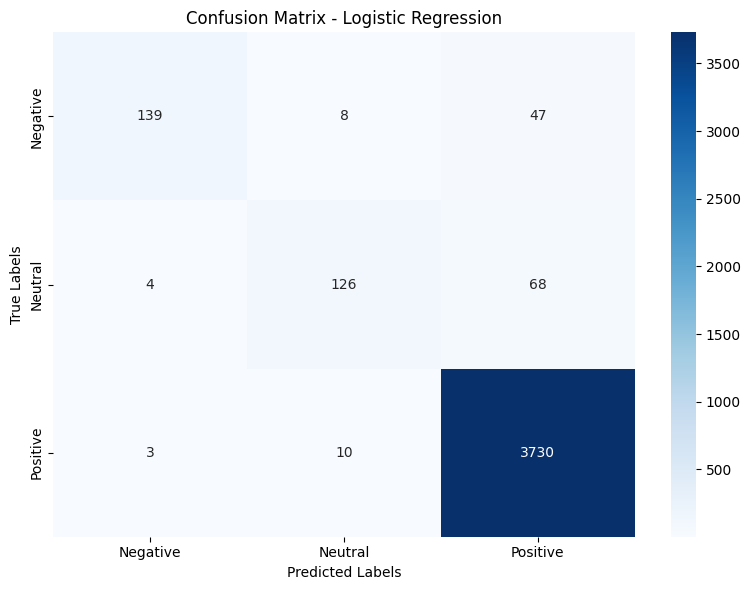

Training Random Forest...
Training time for Random Forest: 35.46 seconds

Testing time for Random Forest: 0.37 seconds

Training Accuracy: 0.9950
Test Accuracy: 0.9833

Performance Metrics for Random Forest:


,Class,Precision,Recall,F1-Score,Support,Testing Time (s)
0,Negative,0.967033,0.907216,0.936170,194,0.367121
1,Neutral,0.930636,0.813131,0.867925,198,0.367121
2,Positive,0.986508,0.996260,0.991360,3743,0.367121
3,Macro Avg,0.961392,0.905536,0.931818,3105385,0.367121
4,Weighted Avg,0.982919,0.983313,0.982860,3105385,0.367121


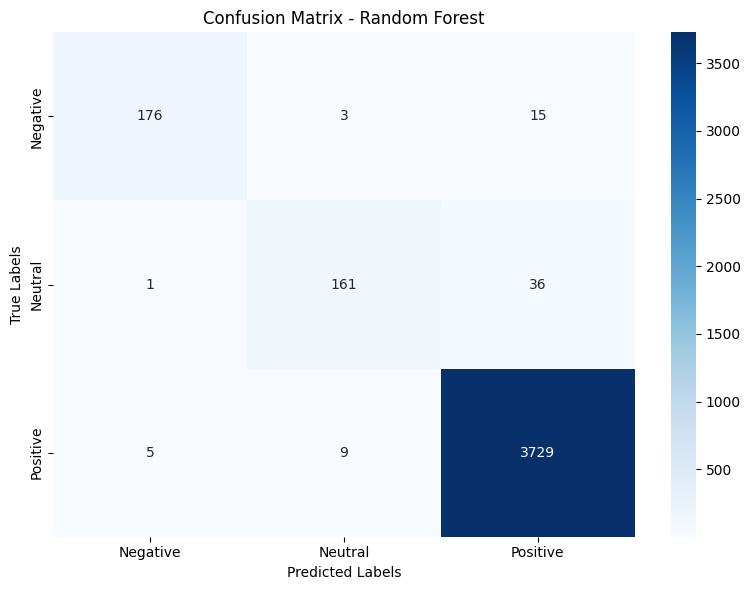

Training SVM...
Training time for SVM: 84.07 seconds

Testing time for SVM: 2.23 seconds

Training Accuracy: 0.9767
Test Accuracy: 0.9669

Performance Metrics for SVM:


,Class,Precision,Recall,F1-Score,Support,Testing Time (s)
0,Negative,0.957143,0.690722,0.802395,194,2.226696
1,Neutral,0.968000,0.611111,0.749226,198,2.226696
2,Positive,0.967183,1.000000,0.983318,3743,2.226696
3,Macro Avg,0.964109,0.767278,0.844980,6214905,2.226696
4,Weighted Avg,0.966751,0.966868,0.963620,6214905,2.226696


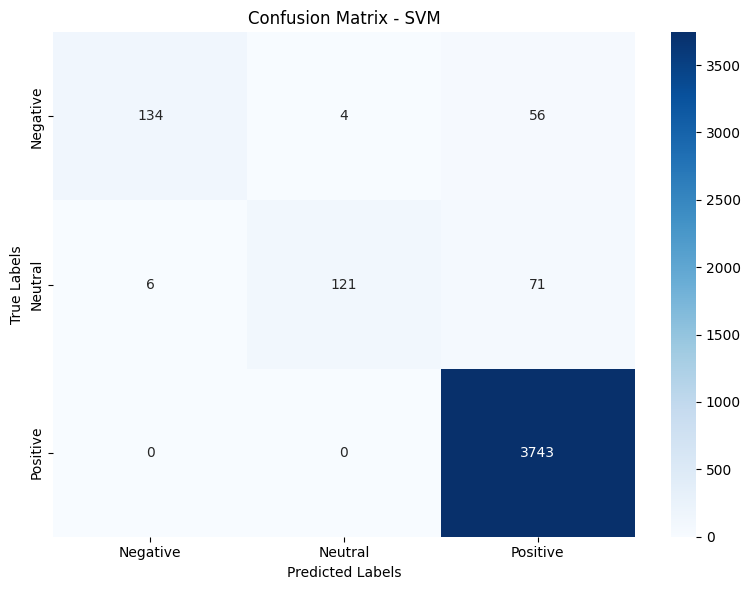


Bảng So Sánh Hiệu Suất Các Mô Hình:


,Model,Train Accuracy,Test Accuracy,Macro F1-Score,Test Time (seconds)
0,Logistic Regression,0.978233,0.966143,0.845873,0.001552
1,Random Forest,0.994982,0.983313,0.931818,0.367121
2,SVM,0.976722,0.966868,0.844980,2.226696


In [ ]:
# Khởi tạo các mô hình
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True)
}

# Khởi tạo danh sách lưu kết quả tổng hợp
comparison_results = []

# Hàm huấn luyện mô hình
def train_model(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    return model, elapsed_time

# Hàm đánh giá mô hình
def evaluate_model(model, X_test):
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    return y_test_pred, elapsed_time

# Hàm vẽ confusion matrix
def plot_confusion_matrix(cm, model_name, class_labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()

# Huấn luyện và đánh giá các mô hình
for name, model in models.items():
    print(f"Training {name}...")

    # Huấn luyện mô hình và tính thời gian huấn luyện
    model, train_time = train_model(model, X_train, y_train)
    print(f"Training time for {name}: {train_time:.2f} seconds\n")

    # Dự đoán trên tập test và đo thời gian
    y_test_pred, test_time = evaluate_model(model, X_test)
    print(f"Testing time for {name}: {test_time:.2f} seconds\n")

    # Tính toán các chỉ số hiệu suất
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification = classification_report(y_test, y_test_pred, target_names=class_labels, output_dict=True)

    # In Training Accuracy và Test Accuracy
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}\n")

    # Tạo DataFrame cho bảng chỉ số chi tiết
    metrics = []
    for label in class_labels:
        metrics.append({
            "Class": label,
            "Precision": classification[label]["precision"],
            "Recall": classification[label]["recall"],
            "F1-Score": classification[label]["f1-score"],
            "Support": int(classification[label]["support"])
        })

    # Thêm Macro Avg và Weighted Avg
    metrics_df = pd.concat([
        pd.DataFrame(metrics),
        pd.DataFrame([{
            "Class": "Macro Avg",
            "Precision": classification["macro avg"]["precision"],
            "Recall": classification["macro avg"]["recall"],
            "F1-Score": classification["macro avg"]["f1-score"],
            "Support": sum(metrics_df["Support"])
        }, {
            "Class": "Weighted Avg",
            "Precision": classification["weighted avg"]["precision"],
            "Recall": classification["weighted avg"]["recall"],
            "F1-Score": classification["weighted avg"]["f1-score"],
            "Support": sum(metrics_df["Support"])
        }])
    ], ignore_index=True)

    # Thêm thời gian kiểm tra vào bảng
    metrics_df["Testing Time (s)"] = test_time

    # Hiển thị bảng chỉ số
    print(f"Performance Metrics for {name}:")
    display(metrics_df)

    # Tính toán và vẽ confusion matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=range(len(class_labels)))
    plot_confusion_matrix(cm, name, class_labels)

    # Lưu kết quả vào danh sách so sánh
    comparison_results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Macro F1-Score": classification['macro avg']['f1-score'],
        "Test Time (seconds)": test_time
    })

# Tạo DataFrame từ kết quả so sánh
comparison_df = pd.DataFrame(comparison_results)

# Hiển thị bảng tổng hợp hiệu suất
print("\nBảng So Sánh Hiệu Suất Các Mô Hình:")
display(comparison_df)

> # **Phần 5: Analyze & Report**

## 1. Phân tích sản phẩm

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def analyze_product(product_id, product_name, final_data):
    # Lọc dữ liệu của sản phẩm cụ thể
    # Chuyển cột 'Ma_san_pham' về kiểu chuỗi để so sánh
    final_data['Ma_san_pham'] = final_data['Ma_san_pham'].astype(str)
    product_id = str(product_id)  # Đảm bảo product_id cũng là chuỗi
    final_data['Ma_san_pham'] = final_data['Ma_san_pham'].str.strip()
    product_id = product_id.strip()

    product_data = final_data[final_data['Ma_san_pham'] == product_id]

    # Kiểm tra xem có dữ liệu cho sản phẩm không
    if product_data.empty:
        print(f"Không tìm thấy dữ liệu cho sản phẩm {product_name} (Mã: {product_id})")
        return

    # Lấy số nhận xét tích cực, tiêu cực và trung tính
    positive_reviews = product_data[product_data['Sentiment'] == 'Positive']
    negative_reviews = product_data[product_data['Sentiment'] == 'Negative']
    neutral_reviews = product_data[product_data['Sentiment'] == 'Neutral']

    positive_count = len(positive_reviews)
    negative_count = len(negative_reviews)
    neutral_count = len(neutral_reviews)

    print(f"Sản phẩm: {product_name} (Mã sản phẩm: {product_id})")
    print(f"Số nhận xét tích cực: {positive_count}")
    print(f"Số nhận xét tiêu cực: {negative_count}")
    print(f"Số nhận xét trung tính: {neutral_count}")

    # Tạo wordcloud cho nhận xét tích cực
    positive_text = " ".join(positive_reviews['Noi_dung_binh_luan'])
    if positive_text:  # Kiểm tra nếu có dữ liệu
        wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    else:
        wordcloud_pos = None  # Không có dữ liệu để tạo wordcloud

    # Tạo wordcloud cho nhận xét tiêu cực
    negative_text = " ".join(negative_reviews['Noi_dung_binh_luan'])
    if negative_text:  # Kiểm tra nếu có dữ liệu
        wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    else:
        wordcloud_neg = None  # Không có dữ liệu để tạo wordcloud

    # Tạo wordcloud cho nhận xét trung tính
    neutral_text = " ".join(neutral_reviews['Noi_dung_binh_luan'])
    if neutral_text:  # Kiểm tra nếu có dữ liệu
        wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
    else:
        wordcloud_neutral = None  # Không có dữ liệu để tạo wordcloud

    # Hiển thị wordcloud tích cực, tiêu cực và trung tính nếu có dữ liệu
    plt.figure(figsize=(18, 6))

    if wordcloud_pos:  # Nếu có wordcloud tích cực, hiển thị
        plt.subplot(1, 3, 1)
        plt.imshow(wordcloud_pos, interpolation="bilinear")
        plt.title(f"Wordcloud - Tích cực ({positive_count})")
        plt.axis("off")
    else:
        plt.subplot(1, 3, 1)
        plt.text(0.5, 0.5, 'Không có nhận xét tích cực', ha='center', va='center', fontsize=12, color='red')
        plt.title(f"Wordcloud - Tích cực ({positive_count})")
        plt.axis("off")

    if wordcloud_neg:  # Nếu có wordcloud tiêu cực, hiển thị
        plt.subplot(1, 3, 2)
        plt.imshow(wordcloud_neg, interpolation="bilinear")
        plt.title(f"Wordcloud - Tiêu cực ({negative_count})")
        plt.axis("off")
    else:
        plt.subplot(1, 3, 2)
        plt.text(0.5, 0.5, 'Không có nhận xét tiêu cực', ha='center', va='center', fontsize=12, color='red')
        plt.title(f"Wordcloud - Tiêu cực ({negative_count})")
        plt.axis("off")

    if wordcloud_neutral:  # Nếu có wordcloud trung tính, hiển thị
        plt.subplot(1, 3, 3)
        plt.imshow(wordcloud_neutral, interpolation="bilinear")
        plt.title(f"Wordcloud - Trung tính ({neutral_count})")
        plt.axis("off")
    else:
        plt.subplot(1, 3, 3)
        plt.text(0.5, 0.5, 'Không có nhận xét trung tính', ha='center', va='center', fontsize=12, color='red')
        plt.title(f"Wordcloud - Trung tính ({neutral_count})")
        plt.axis("off")

    plt.show()

    # Các từ khóa chính liên quan (từ xuất hiện nhiều nhất)
    vectorizer = CountVectorizer(stop_words='english', max_features=10)
    X = vectorizer.fit_transform(product_data['Noi_dung_binh_luan'])
    keywords = vectorizer.get_feature_names_out()

    print(f"\nCác từ khóa chính liên quan đến sản phẩm:")
    for keyword in keywords:
        print(f"- {keyword}")

    # Trực quan hóa số sao
    plt.figure(figsize=(6, 4))
    product_data['So_sao'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f"Phân phối số sao cho sản phẩm: {product_name}")
    plt.xlabel("Số sao")
    plt.ylabel("Số lượng nhận xét")
    plt.xticks(rotation=0)
    plt.show()


Sản phẩm: Mặt Nạ Naruko Bạch Ngọc Lan Dưỡng Sáng, Săn Chắc Da 30ml (Mã sản phẩm: 308500015)
Số nhận xét tích cực: 235
Số nhận xét tiêu cực: 11
Số nhận xét trung tính: 5


<ipython-input-74-416b6d730e2a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Ma_san_pham'] = final_data['Ma_san_pham'].astype(str)
<ipython-input-74-416b6d730e2a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Ma_san_pham'] = final_data['Ma_san_pham'].str.strip()


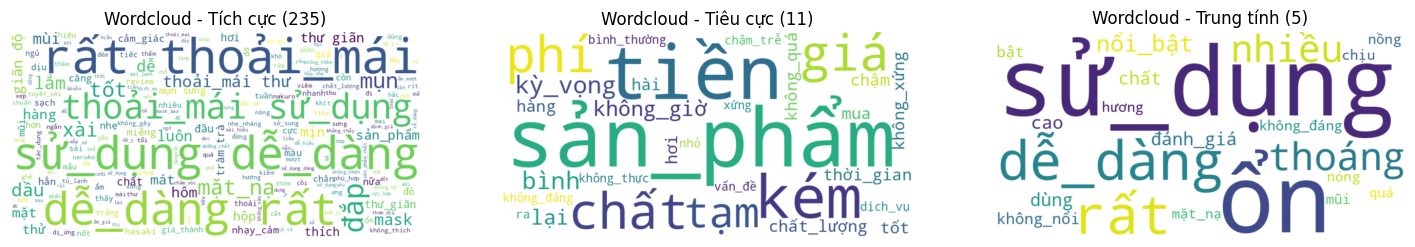


Các từ khóa chính liên quan đến sản phẩm:
- dễ_dàng
- mặt_nạ
- mụn
- rất
- sử_dụng
- thoải_mái
- thư
- tốt
- xài
- đắp


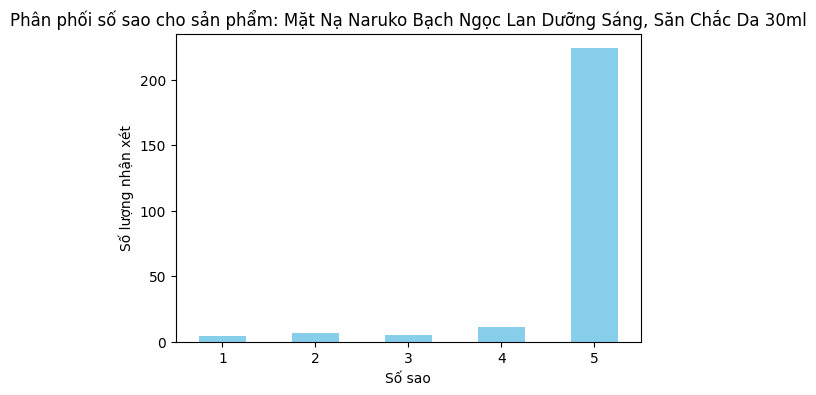

In [ ]:
# Ví dụ phân tích
product_id = '308500015'
product_name = 'Mặt Nạ Naruko Bạch Ngọc Lan Dưỡng Sáng, Săn Chắc Da 30ml'  # Tên sản phẩm

# Gọi hàm phân tích sản phẩm
analyze_product(product_id, product_name, final_data)

## 2. Phân tích cảm xúc

In [ ]:
def predict_sentiment(input_text, model, vectorizer, label_encoder):
    """
    Dự đoán cảm xúc từ văn bản đầu vào.

    Args:
        input_text (str): Văn bản người dùng nhập.
        model: Mô hình đã huấn luyện (Random Forest).
        vectorizer: Bộ vectorizer đã huấn luyện.
        label_encoder: Bộ mã hóa nhãn (LabelEncoder).

    Returns:
        str: Nhãn cảm xúc dự đoán (Negative, Neutral, Positive).
    """
    # Biến đổi văn bản thành vector
    input_vectorized = vectorizer.transform([input_text])

    # Dự đoán nhãn
    prediction = model.predict(input_vectorized)

    # Kiểm tra nhãn đầu ra
    if isinstance(prediction[0], str):  # Nếu nhãn trả về là chuỗi
        prediction = label_encoder.transform(prediction)  # Mã hóa lại sang nhãn số

    # Giải mã nhãn từ số về chuỗi
    sentiment = label_encoder.inverse_transform(prediction)[0]
    return sentiment

In [ ]:
# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf_resampled, y_train_resampled)

# Dự đoán cảm xúc từ input của người dùng
while True:
    user_input = input("Nhập văn bản để dự đoán cảm xúc (hoặc gõ 'exit' để thoát): ")
    if user_input.lower() == 'exit':
        break
    try:
        sentiment = predict_sentiment(user_input, rf_model, tfidf_vectorizer, le)
        print(f"Cảm xúc dự đoán: {sentiment}")
    except ValueError as e:
        print(f"Lỗi dự đoán: {e}")

Nhập văn bản để dự đoán cảm xúc (hoặc gõ 'exit' để thoát): sp tốt
Cảm xúc dự đoán: Positive
Nhập văn bản để dự đoán cảm xúc (hoặc gõ 'exit' để thoát): sp tệ 
Cảm xúc dự đoán: Negative
Nhập văn bản để dự đoán cảm xúc (hoặc gõ 'exit' để thoát): exit
